<a href="https://colab.research.google.com/github/njuliann/athlete_events/blob/main/athletes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the data

Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

import dataset from github repo

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/njuliann/athlete_events/refs/heads/main/athlete_events.csv")

check the shape of the dataset to see whether the import has worked successfully (had some issues with this)

In [60]:
[True if df.shape == (271116, 15) else False]

[True]

# Cleaning the data

Drop the "Games" column as the data is already in the "Year" and "Season" columns. For example:
* Games: 1992 Summer
* Year: 1992
* Season: Summer

In [61]:
df.drop(['Games'], axis = 1, inplace = True)

In [62]:
print(df.shape) # now there should be one less column

(271116, 14)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 29.0+ MB


Find if there are duplicate values in the dataset

In [ ]:
df.duplicated().sum()

np.int64(1385)

In [75]:
df[df.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


Drop all duplicate values

In [76]:
df.drop_duplicates(inplace = True)

# Getting an overview of the data

In [77]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [78]:
df.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,260416.000000,210917.000000,208204.000000,269731.000000
mean,68264.949591,25.454776,175.338953,70.701778,1978.623073
std,39026.253843,6.163869,10.518507,14.349027,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,21.000000,168.000000,60.000000,1960.000000
50%,68233.000000,24.000000,175.000000,70.000000,1988.000000
75%,102111.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


## Find missing values and deal with them

<Axes: >

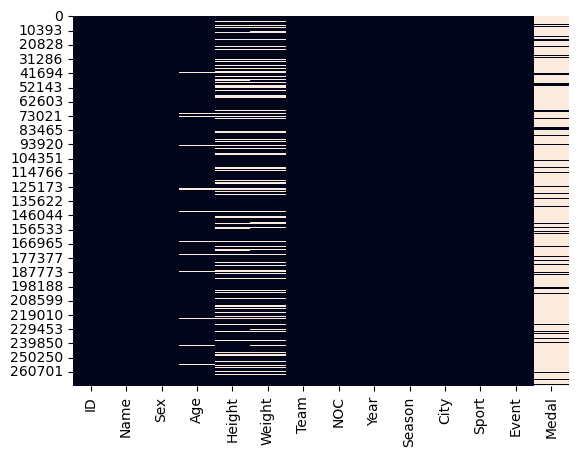

In [79]:
sns.heatmap(df.isnull(), cbar=False)

There are missing values in the following columns: 
- Age (not so many)
- Height
- Weight
- Medal (many)

Any missing value in the Medal column is an athlete participating in the olympic games who does not win a medal

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean(), )
df['Height'] = df['Height'].fillna(df['Height'].mean(), )
df['Weight'] = df['Weight'].fillna(df['Weight'].mean(), )

In [50]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


Now there are no more missing values for Age, Heigth and Weight. 

Get an overview of the number of values in the dataset

In [8]:
df.count()

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

See how many missing values are there in the dataset.

In [9]:
print(df.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


<Axes: xlabel='Age'>

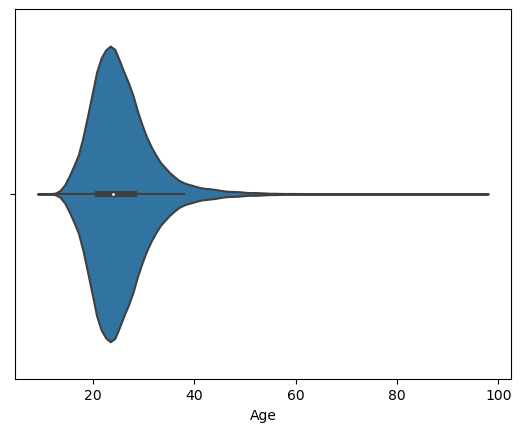

In [87]:
sns.violinplot(x=df["Age"])

<Axes: xlabel='Age'>

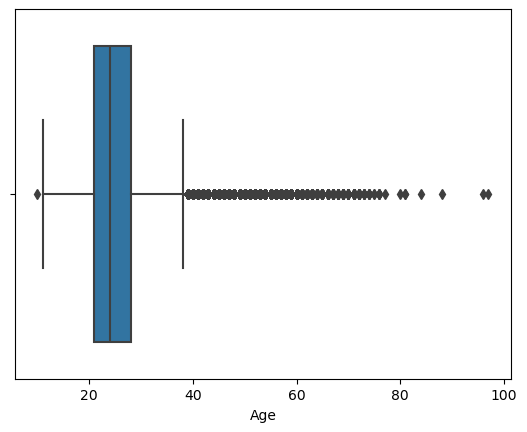

In [88]:
sns.boxplot(x=df["Age"])

Print an overview of the ages.

In [86]:
print(df['Name'].nunique(), "unique athletes")  # Unique athletes
print(df['Sport'].nunique(), "unique sports")  # Unique sports
print("Summary statistics for Age:\n", df['Age'].describe())  # Summary stats for age


134732 unique athletes
66 unique sports
Summary statistics for Age:
 count    260416.000000
mean         25.454776
std           6.163869
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


Distribution of Athletes by Gender

<Axes: title={'center': 'Athlete Gender Distribution'}, xlabel='Sex'>

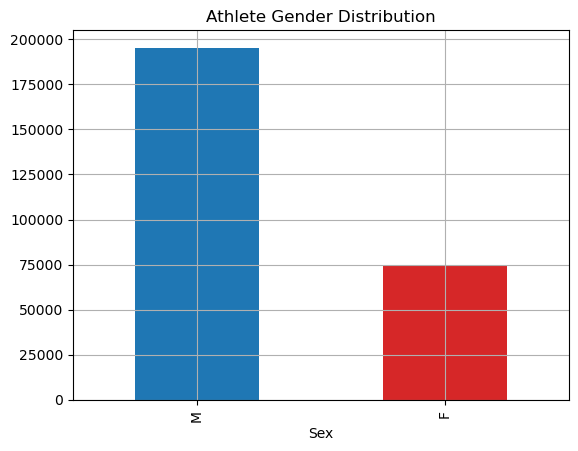

In [96]:
df.Sex.value_counts().plot(kind='bar', title = "Athlete Gender Distribution", color = ['tab:blue', 'tab:red'], grid=True)

Most popular sports

<Axes: title={'center': 'Top 10 most popular Sports'}, ylabel='Sport'>

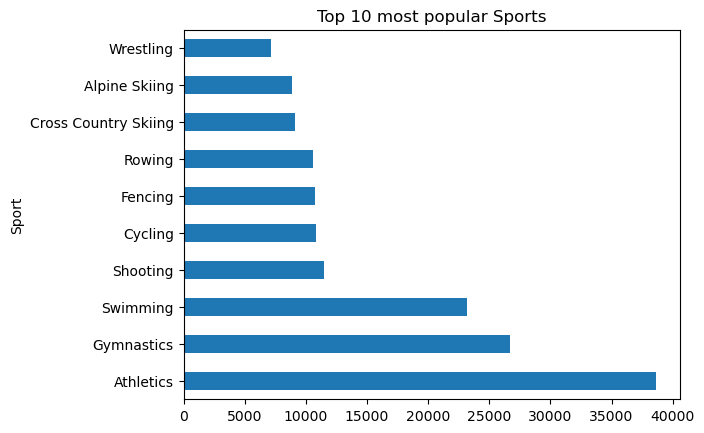

In [106]:
df.Sport.value_counts().head(10).plot(kind = 'barh', title = "Top 10 most popular Sports",)

Getting an overview of the medals

c:\Users\julia\anaconda3\envs\athletes_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julia\anaconda3\envs\athletes_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\julia\anaconda3\envs\athletes_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\julia\anaconda3\envs\athletes_env\Lib\site-pa

<Axes: xlabel='Age', ylabel='Count'>

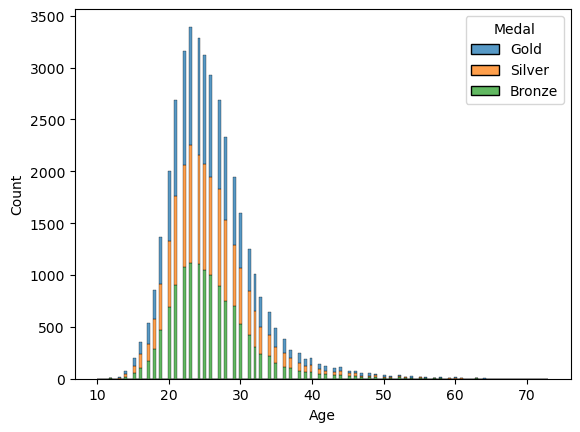

In [113]:
sns.histplot(df, x = "Age", hue = "Medal", hue_order=("Gold", "Silver", "Bronze", ), multiple = "stack")

c:\Users\julia\anaconda3\envs\athletes_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julia\anaconda3\envs\athletes_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\julia\anaconda3\envs\athletes_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\julia\anaconda3\envs\athletes_env\Lib\site-pa

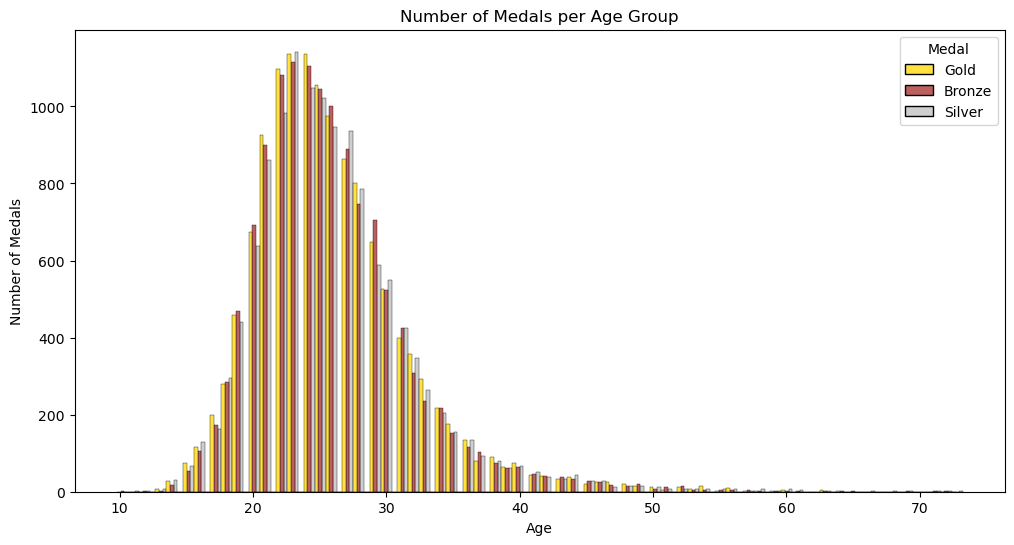

In [114]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x="Age", hue="Medal", multiple="dodge", palette={"Gold": "gold", "Silver": "silver", "Bronze": "brown"}, shrink = 2)
plt.title('Number of Medals per Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Medals')
plt.ticklabel_format(style="scientific", )
plt.tick_params("x")
plt.show()

Some pivot tests

Show the mean age for each year

<Axes: title={'center': 'Mean Age of Athletes per Year'}, xlabel='Year', ylabel='Mean Age'>

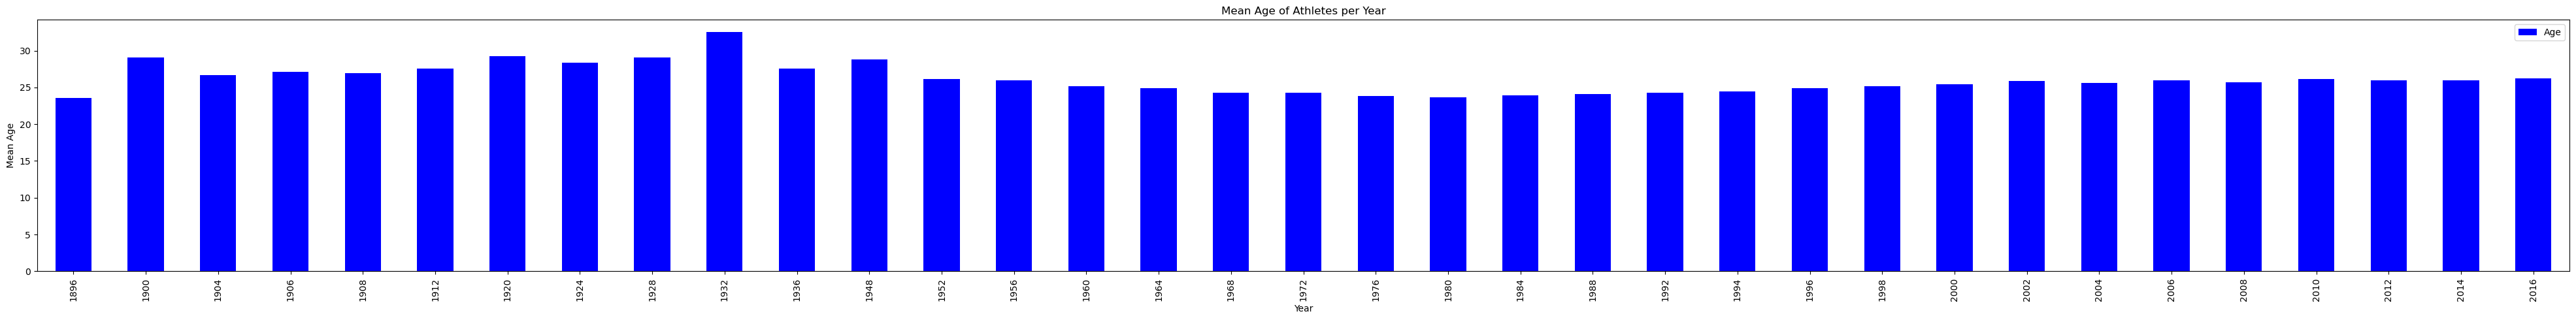

In [12]:
mean_age = df.pivot_table(
    index = 'Year',
    values = 'Age',
    aggfunc = 'mean')

mean_age.plot(
    kind = "bar",
    figsize = (50, 5),
    color = 'blue',
    title="Mean Age of Athletes per Year",
    xlabel = "Year",
    ylabel = "Mean Age",)

## To do: age change per year

<Axes: xlabel='Age'>

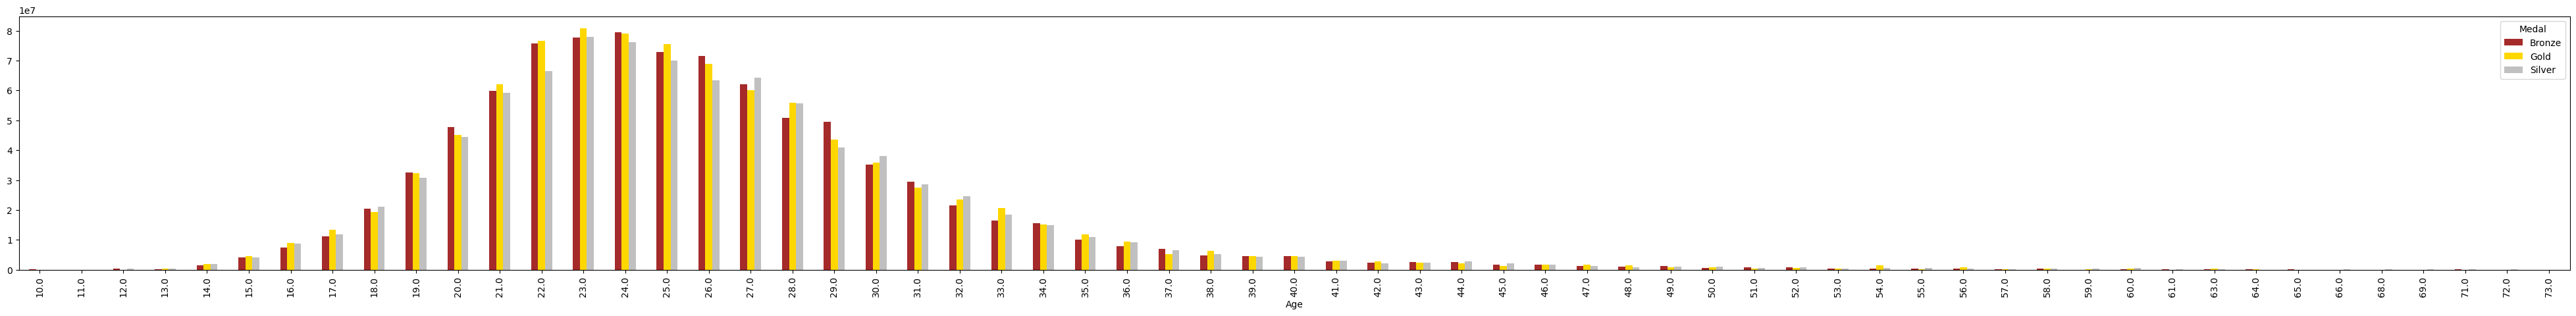

In [13]:
pivot_medals = df.pivot_table(
    index = 'Age',
    columns = 'Medal',
    values = 'ID',
    aggfunc = 'sum',
    fill_value = 0)

pivot_medals.plot(
    kind = "bar",
    stacked = False,
    figsize = (50, 5),
    color = ['brown', 'gold', 'silver'],
    )

Country-wise grouping

In [14]:

df.groupby("Team")["Team"].count()

Team
30. Februar                2
A North American Team      4
Acipactli                  3
Acturus                    2
Afghanistan              126
                        ... 
Zambia                   183
Zefyros                    2
Zimbabwe                 309
Zut                        3
rn-2                       5
Name: Team, Length: 1184, dtype: int64

One has to watch out when working with the data grouped by countries. The Team-column is in most cases the country name. But for example in Equestrianism, the team-column contains the name of the horse. So depending on how the analysis is planned, it might be useful to overwrite the values in the team-column with the country names that can be gained from the NOC-column (National Olympics Comittee)

In [ ]:
# df.query('Team == "30. Februar"')
df.query('Team == "Dow Jones"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
264108,132159,Mieko Yagi,F,58.0,160.0,53.0,Dow Jones,JPN,2008,Summer,Beijing,Equestrianism,"Equestrianism Mixed Dressage, Team",NaN


In [115]:
[i for i in pd.unique(df.NOC)]

['CHN',
 'DEN',
 'NED',
 'USA',
 'FIN',
 'NOR',
 'ROU',
 'EST',
 'FRA',
 'MAR',
 'ESP',
 'EGY',
 'IRI',
 'BUL',
 'ITA',
 'CHA',
 'AZE',
 'SUD',
 'RUS',
 'ARG',
 'CUB',
 'BLR',
 'GRE',
 'CMR',
 'TUR',
 'CHI',
 'MEX',
 'URS',
 'NCA',
 'HUN',
 'NGR',
 'ALG',
 'KUW',
 'BRN',
 'PAK',
 'IRQ',
 'UAR',
 'LIB',
 'QAT',
 'MAS',
 'GER',
 'CAN',
 'IRL',
 'AUS',
 'RSA',
 'ERI',
 'TAN',
 'JOR',
 'TUN',
 'LBA',
 'BEL',
 'DJI',
 'PLE',
 'COM',
 'KAZ',
 'BRU',
 'IND',
 'KSA',
 'SYR',
 'MDV',
 'ETH',
 'UAE',
 'YAR',
 'INA',
 'PHI',
 'SGP',
 'UZB',
 'KGZ',
 'TJK',
 'EUN',
 'JPN',
 'CGO',
 'SUI',
 'BRA',
 'FRG',
 'GDR',
 'MON',
 'ISR',
 'URU',
 'SWE',
 'ISV',
 'SRI',
 'ARM',
 'CIV',
 'KEN',
 'BEN',
 'UKR',
 'GBR',
 'GHA',
 'SOM',
 'LAT',
 'NIG',
 'MLI',
 'AFG',
 'POL',
 'CRC',
 'PAN',
 'GEO',
 'SLO',
 'CRO',
 'GUY',
 'NZL',
 'POR',
 'PAR',
 'ANG',
 'VEN',
 'COL',
 'BAN',
 'PER',
 'ESA',
 'PUR',
 'UGA',
 'HON',
 'ECU',
 'TKM',
 'MRI',
 'SEY',
 'TCH',
 'LUX',
 'MTN',
 'CZE',
 'SKN',
 'TTO',
 'DOM',
 'VIN',


In [116]:
VC_Team = df.NOC.value_counts()
print(VC_Team)

NOC
USA    18604
FRA    12551
GBR    12115
ITA    10668
GER     9734
       ...  
YMD        5
SSD        3
NBO        2
UNK        2
NFL        1
Name: count, Length: 230, dtype: int64


Countries with most medals

In [124]:
df.groupby('NOC')["Medal"].count().sort_values(ascending = False).head(10)

NOC
USA    5637
URS    2503
GER    2165
GBR    2067
FRA    1767
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: Medal, dtype: int64